Author: Ernesto González Date: 23/01/2020

In [2]:
import numpy as np
import pandas as pd
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

Let's start by reading the data file `dados2.dat` and creating a dataframe

In [3]:
with open('dados2.dat', 'r') as infile:
    readlines = infile.readlines()
    
    df = []

    for line in readlines: 
        temp = line.split('   ')
        for elem in temp:
            if elem == '':
                temp.remove(elem)
                continue
            temp[temp.index(elem)] = float(elem.strip())
        df.append([temp[0], float(temp[1]), temp[2], 
                   temp[3], temp[4], temp[5], temp[6], temp[7]])
            
df = pd.DataFrame(df)

In [4]:
df

,0,1,2,3,4,5,6,7
0,-27.403900,34.90900,0.950377,3.307300,34.4068,18.614400,45.17680,4.340000
1,1.017860,2.93073,19.793900,29.140500,71.2174,9.205330,7.38931,0.030000
2,0.657983,4.93615,14.504800,20.598800,117.9200,16.853100,11.44240,0.070000
3,-9.000650,10.95240,18.637400,24.973700,108.0280,19.796300,23.60180,3.070000
4,-21.196100,33.01210,0.457121,21.014900,21.7571,3.921380,14.18610,0.929999
...,...,...,...,...,...,...,...,...
1147,3.177660,2.90066,17.194900,3.562290,52.6569,7.129460,10.08440,0.090000
1148,-44.904600,4.90608,11.905800,25.020600,99.3595,14.777200,14.13750,0.310000
1149,-6.102160,16.93860,0.171050,3.770360,79.5754,0.663618,38.45630,3.420000
1150,0.340030,1.00368,16.701600,21.269900,40.0071,12.436500,33.09370,0.030000


## Apply PCA to whole dataframe

In [5]:
nDF = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

<IPython.core.display.Javascript object>


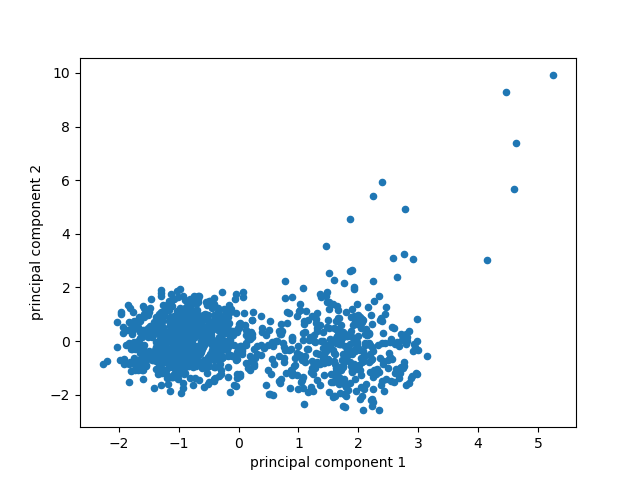

In [6]:
principalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [7]:
pca.components_

array([[-0.06231662,  0.60034468, -0.63131745, -0.24360051, -0.00352116,
        -0.32038198,  0.0171435 ,  0.27358557],
       [ 0.0514632 , -0.16308624,  0.07948795, -0.39625732,  0.5882363 ,
         0.32832776,  0.10172944,  0.58587223]])

In [8]:
pca.explained_variance_ratio_

array([0.23667604, 0.14361326])

From column weight on PC1, column influence to output is:
- `Column 2`
- `Column 1`
- `Column 5`
- `Column 3`
- `Column 0`
- `Column 6`
- `Column 4`

## Separation in three regimes
In the image from the coordinates in the PC1,PC2 plane we can see threee regimes: the first two regimes are composed by one of the clusters each, the third regimes is made by those datapoints with `principal component 2` higher thant $2.2$.

### Third Regime (PC2 higher thant 2.2)

In [9]:
# separating those points with pc2>2.2
third_regime_idx = principalDf.index[principalDf['principal component 2']>2.2]
thirdRegimeDf = df.loc[third_regime_idx]

In [10]:
thirdRegimeDf

,0,1,2,3,4,5,6,7
11,-17.762000,39.462100,1.460260,2.053510,148.0770,18.68350,26.59500,152.9550
138,-19.126000,3.204530,0.283496,16.389200,106.1790,17.63680,52.84820,337.8780
210,1.519210,6.566470,1.029860,0.532780,111.8200,19.23360,27.78210,346.9970
221,-30.235000,21.038200,0.876533,7.404550,124.9500,4.58668,2.40344,500.8170
390,-33.829400,11.014700,0.582836,12.558200,124.5430,14.40750,24.54170,380.1400
418,-42.708000,2.614320,0.292802,12.755600,101.8240,10.48980,32.21190,184.6280
548,-3.053500,16.600700,1.105690,2.714560,61.5454,13.59120,24.85550,258.6810
554,-43.631700,2.888130,0.782397,0.004260,136.7860,18.92130,23.67080,371.7110
569,-33.769500,25.706900,2.125460,0.206982,138.8850,13.72950,41.69180,91.8212
580,-11.932100,8.200370,0.815657,2.911930,38.8261,9.67358,32.52560,668.6610


<IPython.core.display.Javascript object>


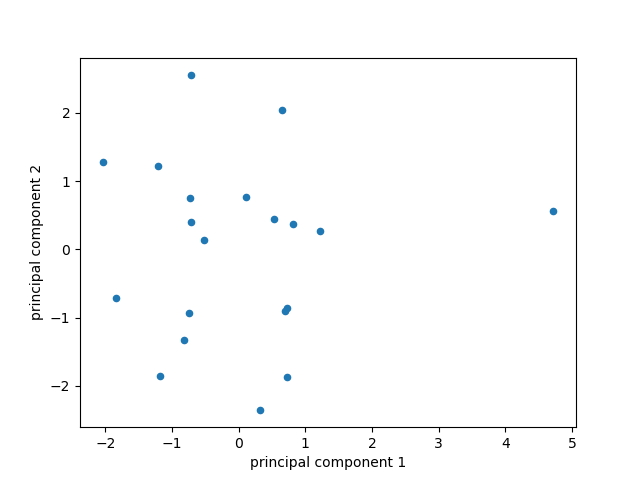

In [11]:
# Normalizing and applying PCA to third regime
thirdRegimeNDF = StandardScaler().fit_transform(thirdRegimeDf)
third_reg_pca = PCA(n_components=2)
third_regime_principal_components = third_reg_pca.fit_transform(thirdRegimeNDF)
ThirdRegimeprincipalDf = pd.DataFrame(data=third_regime_principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

ThirdRegimeprincipalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [12]:
third_reg_pca.components_

array([[-0.34828383,  0.02942409,  0.62114194, -0.48083896, -0.29899667,
         0.02444691, -0.400409  ,  0.102397  ],
       [ 0.11135717, -0.65512794, -0.13601516,  0.06862336, -0.52128504,
         0.23722642,  0.07992878,  0.4481011 ]])

In [13]:
third_reg_pca.explained_variance_ratio_

array([0.25129553, 0.20641748])

From column weight on PC1, column influence to output on __Third Regime__ is:
- `Column 2`
- `Column 3`
- `Column 6`
- `Column 0`
- `Column 1`
- `Column 4`
- `Column 5`

### First and Second Regimes

First we must exclude points that are in the third regime and apply a clustering algorithm to to `principalDf`.

In [22]:
# remove those points with pc2>2.2 in principalDf
first_and_second_regime_idx = principalDf.index[principalDf['principal component 2']<=2.2]
firstAndSecondRegimeDf = principalDf.loc[first_and_second_regime_idx]

kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(firstAndSecondRegimeDf[['principal component 1', 'principal component 2']])
firstAndSecondRegimeDf['Cluster'] = y

In [23]:
firstAndSecondRegimeDf

,principal component 1,principal component 2,Cluster
0,1.959243,-0.094939,0
1,-1.666864,-0.882865,1
2,-1.314353,0.529521,1
3,-1.602360,0.428567,1
4,2.221280,-2.152022,0
...,...,...,...
1146,-0.285713,-0.620942,1
1147,-0.616426,-0.121670,1
1148,-0.912584,-0.187558,1
1149,2.070739,-0.354459,0


Now we separate first and second regime into two different dataframes from the original dataframe `df`.

### First Regime

In [30]:
# getting points in first regime (left cluster)
first_regime_idx = firstAndSecondRegimeDf.index[firstAndSecondRegimeDf['Cluster']==1]
firstRegimeDf = df.loc[first_regime_idx]

In [31]:
firstRegimeDf

,0,1,2,3,4,5,6,7
1,1.017860,2.930730,19.79390,29.14050,71.21740,9.20533,7.38931,0.03
2,0.657983,4.936150,14.50480,20.59880,117.92000,16.85310,11.44240,0.07
3,-9.000650,10.952400,18.63740,24.97370,108.02800,19.79630,23.60180,3.07
5,2.180230,1.033750,19.30060,16.84810,58.56770,14.51230,30.39860,0.03
6,-15.986200,1.142200,13.51830,26.01400,92.62060,7.46707,3.46095,0.03
...,...,...,...,...,...,...,...,...
1145,-20.513700,0.786783,8.26637,2.93807,121.90100,6.52699,32.96890,0.05
1146,-24.505500,0.895232,2.48400,12.10400,5.95422,19.48170,6.03130,0.05
1147,3.177660,2.900660,17.19490,3.56229,52.65690,7.12946,10.08440,0.09
1148,-44.904600,4.906080,11.90580,25.02060,99.35950,14.77720,14.13750,0.31


Now we apply PCA method, as usual.

<IPython.core.display.Javascript object>


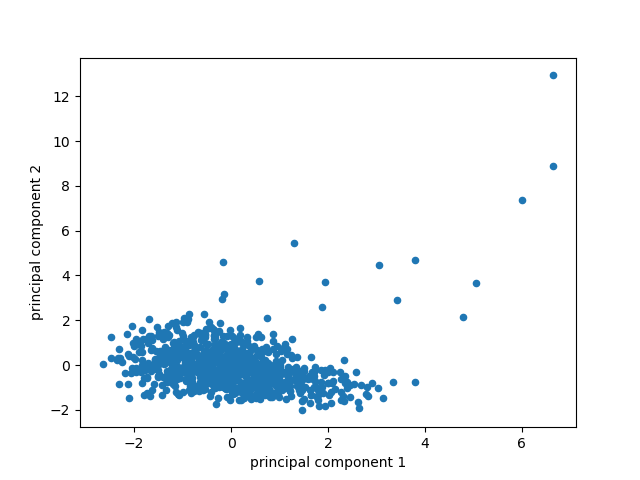

In [34]:
# Normalizing and applying PCA to first regime
firstRegimeNDF = StandardScaler().fit_transform(firstRegimeDf)
first_reg_pca = PCA(n_components=2)
first_regime_principal_components = first_reg_pca.fit_transform(firstRegimeNDF)
firstRegimeprincipalDf = pd.DataFrame(data=first_regime_principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

firstRegimeprincipalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [36]:
first_reg_pca.components_

array([[ 0.03894116,  0.70790958,  0.14996253,  0.1158229 ,  0.10868018,
         0.58907969, -0.03621398,  0.31828634],
       [ 0.13619738, -0.16634346, -0.68622084,  0.36312824, -0.06104441,
        -0.01158479,  0.01876729,  0.58890247]])

In [37]:
first_reg_pca.explained_variance_ratio_

array([0.19038451, 0.16311814])

From column weight on PC1, column influence to output on __First Regime__ is:
- `Column 1`
- `Column 5`
- `Column 2`
- `Column 3`
- `Column 4`
- `Column 0`
- `Column 6`

### Second Regime

In [32]:
# getting points in second regime (right cluster)
second_regime_idx = firstAndSecondRegimeDf.index[firstAndSecondRegimeDf['Cluster']==0]
secondRegimeDf = df.loc[second_regime_idx]

In [33]:
secondRegimeDf

,0,1,2,3,4,5,6,7
0,-27.403900,34.90900,0.950377,3.307300,34.40680,18.614400,45.1768,4.340000
4,-21.196100,33.01210,0.457121,21.014900,21.75710,3.921380,14.1861,0.929999
8,3.383960,21.19640,0.627083,0.596993,109.64700,3.944430,43.9921,7.370070
10,-11.774300,19.29950,0.133826,18.304600,96.99740,9.251430,13.0014,5.230020
14,0.310564,7.48382,0.303788,27.886700,34.88730,9.274480,42.8075,23.510400
...,...,...,...,...,...,...,...,...
1135,-21.952000,14.28250,0.154420,17.316500,128.55500,15.287500,34.0288,15.860300
1138,-27.939600,34.44520,1.480860,1.065410,29.63460,4.719570,47.6224,1.330000
1141,3.731930,30.65120,0.494344,6.480660,4.33513,15.333600,39.6409,4.530010
1144,0.894300,28.75420,0.001088,24.188300,141.68500,0.640568,8.6502,5.480030


<IPython.core.display.Javascript object>


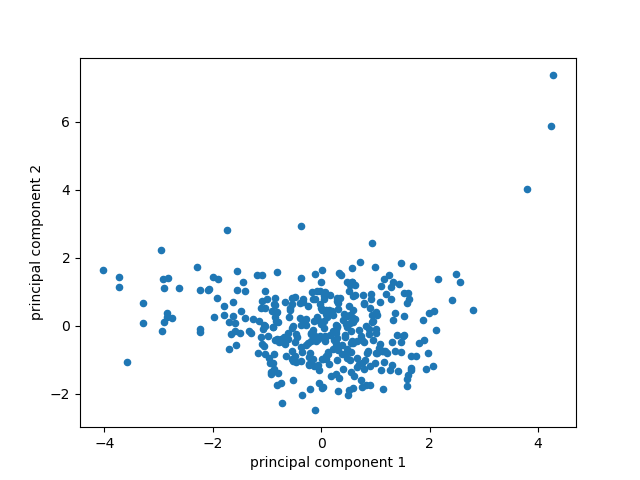

In [35]:
# Normalizing and applying PCA to second regime
secondRegimeNDF = StandardScaler().fit_transform(secondRegimeDf)
second_reg_pca = PCA(n_components=2)
second_regime_principal_components = second_reg_pca.fit_transform(secondRegimeNDF)
secondRegimeprincipalDf = pd.DataFrame(data=second_regime_principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

secondRegimeprincipalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

In [38]:
second_reg_pca.components_

array([[-0.27053179,  0.24152138,  0.24554851,  0.28483213, -0.53363869,
        -0.20928274, -0.02547444, -0.63074408],
       [-0.35132015,  0.00773634,  0.6064216 , -0.54190224, -0.19657023,
         0.26047033,  0.24997034,  0.21480058]])

In [39]:
second_reg_pca.explained_variance_ratio_

array([0.19114149, 0.15019652])

From column weight on PC1, column influence to output on __Second Regime__ is:
- `Column 4`
- `Column 3`
- `Column 0`
- `Column 2`
- `Column 1`
- `Column 5`
- `Column 6`

## Results

Order of column influence to output (by weight in PC1), from most influent to less influent

\begin{array}{|c|c|c|c|} \hline
    \text{All} & \text{First Regime} & \text{Second Regime} & \text{Third Regime} \\ \hline
    2 & 1 & 4 & 2\\ \hline
    1 & 5 & 3 & 3\\ \hline
    5 & 2 & 0 & 6\\ \hline
    3 & 3 & 2 & 0\\ \hline
    0 & 4 & 1 & 1\\ \hline
    6 & 0 & 5 & 4\\ \hline
    4 & 6 & 6 & 5\\ \hline
\end{array}
